<a href="https://colab.research.google.com/github/MakovChen/SideProject-QuantApplication/blob/main/%E5%9F%BA%E6%96%BC%E6%9C%AC%E7%9B%8A%E6%AF%94%E5%8F%8AgammaPSO%E7%9A%84%E8%B3%87%E7%94%A2%E6%8A%95%E8%B3%87%E9%83%A8%E4%BD%8D%E6%9C%80%E4%BD%B3%E5%8C%96_%E4%BB%A5%E5%8F%B0%E7%A9%8D%E9%9B%BB%E7%82%BA%E4%BE%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **安裝相依工具包**

In [ ]:
!pip install yfinance
!pip install mpl_finance
import mpl_finance as mpf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **從YAHOO擷取歷史成交紀錄**

In [ ]:
CODE = '2330' #輸入股票代號

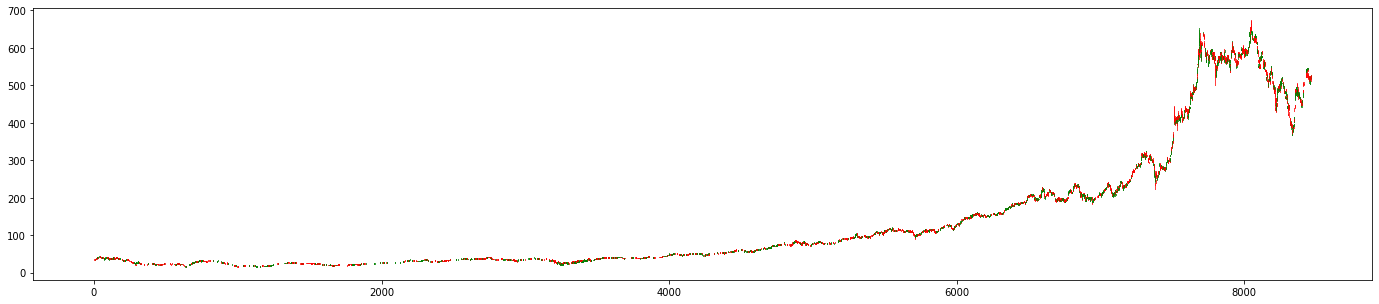

,Open,High,Low,Close,Volume
2000-01-04 00:00:00+08:00,35.393497,35.393497,34.796982,35.393497,2.006623e+11
2000-01-05 00:00:00+08:00,35.393488,36.188778,34.995748,36.188778,4.024668e+11
2000-01-06 00:00:00+08:00,35.990012,36.188787,35.393497,35.393497,1.975457e+11
2000-01-07 00:00:00+08:00,34.200464,34.796979,33.802724,34.399239,2.352703e+11
2000-01-08 00:00:00+08:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-03-06 00:00:00+08:00,520.000000,524.000000,517.000000,521.000000,2.192208e+07
2023-03-07 00:00:00+08:00,521.000000,526.000000,519.000000,524.000000,2.486108e+07
2023-03-08 00:00:00+08:00,521.000000,523.000000,518.000000,521.000000,2.451241e+07
2023-03-09 00:00:00+08:00,525.000000,526.000000,522.000000,522.000000,2.155758e+07


In [ ]:
#獲取資料表，保留收盤日之欄位
df = yf.Ticker(CODE + ".TW").history(period="max").loc[:,['Open', 'High', 'Low', 'Close', 'Volume']]
df = df.reindex(pd.date_range(df.index[0],df.index[-1],freq='D'))
#繪製K線圖及資料表
fig = plt.figure(figsize=[24, 5]); ax = plt.subplot(111)
mpf.candlestick2_ochl(ax, df.Open, df.Close, df.High, df.Low, width=0.5, colorup='g', colordown='r')
plt.show()
df

### **投資成本效益分析**

In [ ]:
BASIC_Info = {"Season": ["2022Q3", "2022Q2", "2022Q1", "2021Q4", "2021Q3", "2021Q2", "2021Q1", "2020Q4"],
              "PE_Ratio": [2.23, 2.98, 3.29, 4.45, 4.75, 4.95, 5.42, 6.01],
              "NAV": [179.07, 167.60, 153.98, 143.68, 128.51, 119.27, 112.58, 106.47],
              }
BASIC_Info['NAV_Growth'] = pd.Series(BASIC_Info['NAV']) / pd.Series(BASIC_Info['NAV']).shift(-1) - 1
#基本資訊
print('財報季度: {:s}'.format(BASIC_Info["Season"][0]))
print('股價最新日期: {:s}'.format(str(df.index[-1])))
print('股票價格: {:.2f}元'.format(df["Close"][-1]))
print('股票淨值: {:.2f}元'.format(BASIC_Info["NAV"][0]), '(本益比: {:.2f})'.format(df["Close"][-1] / BASIC_Info["NAV"][0]))
print('歷史最低本益比: {:.2f}'.format(min(BASIC_Info["PE_Ratio"])))
print('平均淨值成長率(季/%): {:.2f}%\n'.format(np.mean(BASIC_Info["NAV_Growth"][:-1]) * 100))

#風險評估
print('*回收期評估: {:.2f}年~{:.2f}年'.format(np.log(df["Close"][-1] / min(BASIC_Info["PE_Ratio"]) / BASIC_Info["NAV"][0]) / np.log(1 + np.mean(BASIC_Info["NAV_Growth"][:-1])) / 4, np.log(df["Close"][-1] / np.mean(BASIC_Info["PE_Ratio"]) / BASIC_Info["NAV"][0]) / np.log(1 + np.mean(BASIC_Info["NAV_Growth"][:-1])) / 4))
pd.DataFrame(BASIC_Info)

財報季度: 2022Q3
股價最新日期: 2023-03-10 00:00:00+08:00
股票價格: 513.00元
股票淨值: 179.07元 (本益比: 2.86)
歷史最低本益比: 2.23
平均淨值成長率(季/%): 7.73%

*回收期評估: 0.84年~-1.33年


,Season,PE_Ratio,NAV,NAV_Growth
0,2022Q3,2.23,179.07,0.068437
1,2022Q2,2.98,167.60,0.088453
2,2022Q1,3.29,153.98,0.071687
3,2021Q4,4.45,143.68,0.118045
4,2021Q3,4.75,128.51,0.077471
5,2021Q2,4.95,119.27,0.059424
6,2021Q1,5.42,112.58,0.057387
7,2020Q4,6.01,106.47,NaN


### **資金部位最佳化**

In [ ]:
class PSO_gamma():
    def __init__(self, N, iteration, c1, c2, sample, lim):
        self.lim = lim
        self.sample = sample
        self.c1, self.c2 = c1, c2
        self.iter = iteration
        self.particle = N
        self.dimension = 2
        self.pos = np.random.uniform(low = 0, high = self.lim, size= (N, self.dimension))
        self.out = self.fun(self.pos)
        self.pbest = self.pos
        self.gbest = self.pos[np.argmin(self.out, axis = 0)]
        self.velocity = np.zeros((N, self.dimension))
        
    def fun(self, pos):
        x1, x2, out = pos[:,0],pos[:,1], []
        for loc, scale in zip(x1, x2):
            dist = scipy.stats.gamma(loc, scale=scale)
            distance = np.mean([1 - scipy.stats.ks_2samp(self.sample, dist.rvs(size=len(self.sample) * 16))[1] for _ in range(16)])
            out.append(distance)
        return np.array(out)
    
    def update_pbest(self):
        out = self.fun(self.pos)
        for i in range(self.particle):
            if out[i] < self.out[i]:
                self.pbest[i] = self.pos[i]
            if out[i] < self.fun(self.gbest.reshape(1, -1))[0]:
                self.gbest = self.pos[i]
        self.out = out
        return self.gbest, self.fun(self.gbest.reshape(1, -1))[0]
    
    def update_velocity(self):
        valid = np.array([0 if len(np.where(self.pos[i]==self.gbest)[0]) >= self.dimension else 1 for i in range(self.particle)])
        w = np.random.uniform(low=0.4, high=0.9, size=(self.particle)) * valid 
        w = np.array([w, w]).T
        v1 = w * self.velocity
        v2 = w * self.c1 * (self.pbest - self.pos)
        v3 = w * self.c2 * (self.gbest - self.pos)
        self.velocity = (v1 + v2 + v3) *  (1 - 1 / np.exp(scipy.spatial.distance.euclidean(self.pos[:,0], self.pos[:,1] / 10)))
        
    def update_position(self):
        new_pos = self.pos + self.velocity
        for i in range(self.particle):
            if new_pos[i][0] < 0 or new_pos[i][1] < 0 or new_pos[i][0] > self.lim or new_pos[i][1] > self.lim:
                new_pos[i] = np.random.uniform(low=0, high= self.lim, size=(self.dimension))
                self.velocity[i] = [0 for i in range(self.dimension)]
            self.pos = new_pos
            
    def fit(self):
        for i in range(self.iter):
            self.update_velocity()
            self.update_position()
            gbest, val = self.update_pbest()

        print('shape:',gbest[0],', scale:', gbest[1])
        dist = scipy.stats.gamma(gbest[0], scale=gbest[1])

        df = pd.DataFrame({'label':['sample' for _ in self.sample] + ['gamma' for _ in range(len(self.sample)*16)], 'value': list(self.sample) + list(dist.rvs(size=len(self.sample)*16))})
        sns.displot(df, x="value", hue="label", stat="density")
        plt.show()
        return dist

shape: 4.221486241191017 , scale: 1.047082735719444


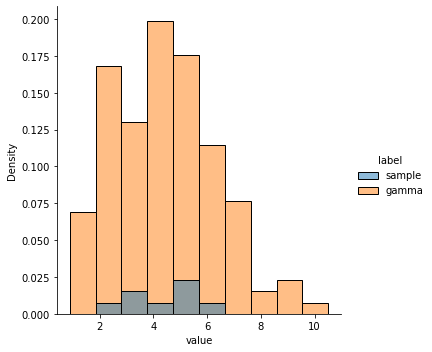

In [ ]:
sample = BASIC_Info['PE_Ratio']#scipy.stats.gamma(0.5, scale= 2).rvs(size=64)
gen = PSO_gamma(N = 128, iteration = 32, c1 = 1, c2 = 1, sample = sample, lim = np.mean(BASIC_Info['PE_Ratio']))
gamma = gen.fit()
gamma

長期穩定成長的情況下, 可投入之資本部位: 25.37 %


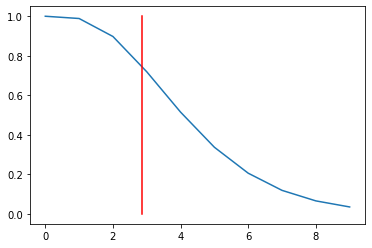

In [ ]:
print('長期穩定成長的情況下, 可投入之資本部位: {:.2f} %'.format(gamma.cdf(df["Close"][-1] / BASIC_Info["NAV"][0])* 100))
plt.plot([1 - gamma.cdf(i) for i in range(10)])
plt.plot([df["Close"][-1] / BASIC_Info["NAV"][0], df["Close"][-1] / BASIC_Info["NAV"][0]], [0, 1], color = 'red')
plt.show()